# LCEL Usecases

In [44]:
!pip install --upgrade --quiet  langchain-core langchain-community langchain-openai

In [53]:
import os
os.environ["OPENAI_API_KEY"]      = "sk-***********************************************"

## Invoke

In [70]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


prompt = ChatPromptTemplate.from_template(
    "Tell me a short joke about {topic}"
)
output_parser = StrOutputParser()
model = ChatOpenAI(model="gpt-3.5-turbo")
chain = (
    {"topic": RunnablePassthrough()}
    | prompt
    | model
    | output_parser
)

chain.invoke("ice cream")

'Why did the ice cream truck break down? It had too many frozen treats!'

## Stream

In [72]:
for chunk in chain.stream("ice cream"):
    print(chunk, end="", flush=True)


Why did the ice cream truck break down?
Because it had too many "scoops"!

## Batch

In [73]:
chain.batch(["ice cream", "spaghetti", "dumplings"])

['Why did the ice cream truck break down?\nIt had too many "scoops"!',
 'Why did the spaghetti go to the party? Because it was a "pasta" time!',
 'Why did the dumpling go to the party? Because it was on a roll!']

## Async

In [74]:
chain.ainvoke("ice cream")

<coroutine object RunnableSequence.ainvoke at 0x79bf37f41b60>

## Logging

In [76]:
import os

os.environ["LANGCHAIN_API_KEY"] = "ls__****************************************"
os.environ["LANGCHAIN_TRACING_V2"] = "true"

chain.invoke("ice cream")

'Why did the ice cream truck break down? Because it had too many “scoops” of ice cream!'

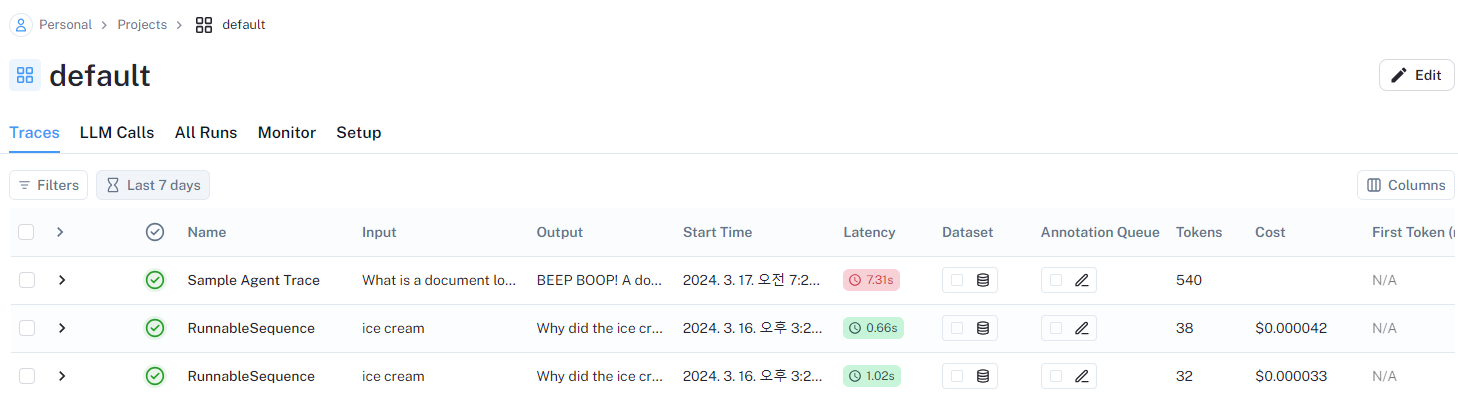

## **Full code**

In [77]:
import os

from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough, ConfigurableField

os.environ["LANGCHAIN_API_KEY"] = "ls__****************************************"
os.environ["LANGCHAIN_TRACING_V2"] = "true"

prompt = ChatPromptTemplate.from_template(
    "Tell me a short joke about {topic}"
)
chat_openai = ChatOpenAI(model="gpt-3.5-turbo")
openai = OpenAI(model="gpt-3.5-turbo-instruct")

model = (
    chat_openai
    .with_fallbacks([openai])
    .configurable_alternatives(
        ConfigurableField(id="model"),
        default_key="chat_openai",
        openai=openai
    )
)

chain = (
    {"topic": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [78]:
chain.invoke("ice cream")

"Why did the ice cream break up with the spoon? \n\nBecause it couldn't handle the cold shoulder!"